In [32]:
help(cv2)

Help on package cv2.cv2 in cv2:

NAME
    cv2.cv2 - Python wrapper for OpenCV.

PACKAGE CONTENTS
    cv2
    data (package)
    version

CLASSES
    builtins.Exception(builtins.BaseException)
        cv2.error
    builtins.object
        cv2.Algorithm
            cv2.AlignExposures
                cv2.AlignMTB
            cv2.BackgroundSubtractor
                cv2.BackgroundSubtractorKNN
                cv2.BackgroundSubtractorMOG2
                cv2.bgsegm_BackgroundSubtractorCNT
                cv2.bgsegm_BackgroundSubtractorGMG
                cv2.bgsegm_BackgroundSubtractorGSOC
                cv2.bgsegm_BackgroundSubtractorLSBP
                cv2.bgsegm_BackgroundSubtractorMOG
            cv2.BaseCascadeClassifier
            cv2.CLAHE
            cv2.CalibrateCRF
                cv2.CalibrateDebevec
                cv2.CalibrateRobertson
            cv2.DenseOpticalFlow
                cv2.DISOpticalFlow
                cv2.FarnebackOpticalFlow
                cv2.Variational

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("kingfisher.jpg")[:,:,::-1]
imgOut = 255 * np.ones(img.shape, dtype = img.dtype)

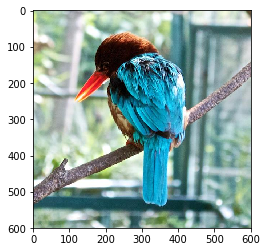

In [3]:
plt.imshow(img)

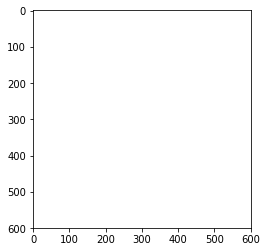

In [4]:
plt.imshow(imgOut)

In [5]:
triIn = np.float32([[[360,50], [60,100], [300,400]]])
triOut = np.float32([[[400,200], [160,270], [400,400]]])

In [22]:
triIn_img = img.copy()
triOut_img = img.copy()

In [15]:
cv2.line(triIn_img, (360,50), (60,100), (255,0,255), 2, cv2.LINE_AA)
cv2.line(triIn_img, (60,100), (300,400), (255,0,255), 2, cv2.LINE_AA)
cv2.line(triIn_img, (300,400), (360,50), (255,0,255), 2, cv2.LINE_AA)

array([[[182, 212, 158],
        [179, 209, 155],
        [180, 210, 158],
        ...,
        [118,  98,  73],
        [117,  95,  71],
        [111,  89,  65]],

       [[182, 212, 158],
        [179, 209, 155],
        [180, 210, 156],
        ...,
        [114,  94,  69],
        [113,  91,  67],
        [107,  85,  61]],

       [[183, 214, 157],
        [181, 212, 155],
        [181, 212, 155],
        ...,
        [109,  89,  64],
        [107,  87,  62],
        [102,  82,  57]],

       ...,

       [[151, 180, 152],
        [160, 189, 161],
        [170, 196, 169],
        ...,
        [135, 168, 141],
        [136, 169, 142],
        [137, 170, 141]],

       [[152, 181, 153],
        [160, 189, 161],
        [170, 196, 171],
        ...,
        [130, 163, 136],
        [132, 165, 138],
        [132, 165, 136]],

       [[150, 179, 151],
        [158, 187, 159],
        [167, 193, 168],
        ...,
        [128, 161, 134],
        [131, 164, 137],
        [131, 164, 135]]

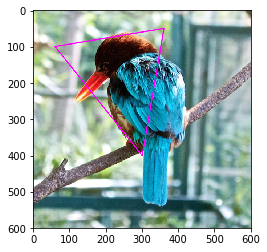

In [16]:
plt.imshow(triIn_img)

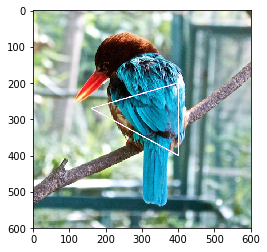

In [24]:
cv2.line(triOut_img, (400,200), (160,270), (255,255,255), 2, cv2.LINE_AA)
cv2.line(triOut_img, (160,270), (400,400), (255,255,255), 2, cv2.LINE_AA)
plt.imshow(cv2.line(triOut_img, (400,400), (400,200), (255,255,255), 2, cv2.LINE_AA))

In [6]:
def warpTriangle(imgIn, imgOut, triIn, triOut):
    rec1= cv2.boundingRect(triIn)
    rec2 = cv2.boundingRect(triOut)

    img1Cropped = img[rec1[1]:rec1[1]+rec1[3],rec1[0]:rec1[0]+rec1[2]]
    #plt.imshow(img1Cropped)
    tri1cropped = []
    tri2cropped = []
    for i in range(0,3):
        tri1cropped.append((triIn[0][i][0]-rec1[0],triIn[0][i][1]-rec1[1]))
        tri2cropped.append((triOut[0][i][0]-rec2[0],triOut[0][i][1]-rec2[1]))
    wrapMat = cv2.getAffineTransform(np.float32(tri1cropped),np.float32(tri2cropped))
    img2cropped =  cv2.warpAffine(img1Cropped, wrapMat, (rec2[2], rec2[3]), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)
    #plt.imshow(img2cropped)
    mask = np.zeros((rec2[3], rec2[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tri2cropped), (1.0,1.0,1.0), 16, 0)
    img2cropped = img2cropped * mask
    
    # Copy triangular region of the rectangular patch to the output image
    imgOut[rec2[1]:rec2[1]+rec2[3], rec2[0]:rec2[0]+rec2[2]] = \
    imgOut[rec2[1]:rec2[1]+rec2[3], rec2[0]:rec2[0]+rec2[2]]*((1.0, 1.0, 1.0)-mask)

    imgOut[rec2[1]:rec2[1]+rec2[3], rec2[0]:rec2[0]+rec2[2]] = \
    imgOut[rec2[1]:rec2[1]+rec2[3], rec2[0]:rec2[0]+rec2[2]]+img2cropped
    plt.imshow(imgOut)

In [7]:
warpTriangle(img, imgOut, triIn, triOut)

(60, 50, 301, 351)
(160, 200, 241, 201)


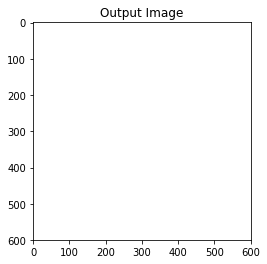

In [21]:
plt.imshow(imgOut[:,:,::-1])
plt.title("Output Image")
plt.show()